In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:

# Read the sample dataset
df = pd.read_csv('train.csv')

In [29]:
# Display the first few rows of the dataset
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
# Check the summary statistics of the numerical variables
print(df.describe())



       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [31]:
# Check the data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [32]:

# Count the number of unique values in each categorical variable
print(df.select_dtypes(include=['object']).nunique())


Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64


In [33]:

# Analyze the target variable distribution
print(df['Loan_Status'].value_counts())



Y    422
N    192
Name: Loan_Status, dtype: int64


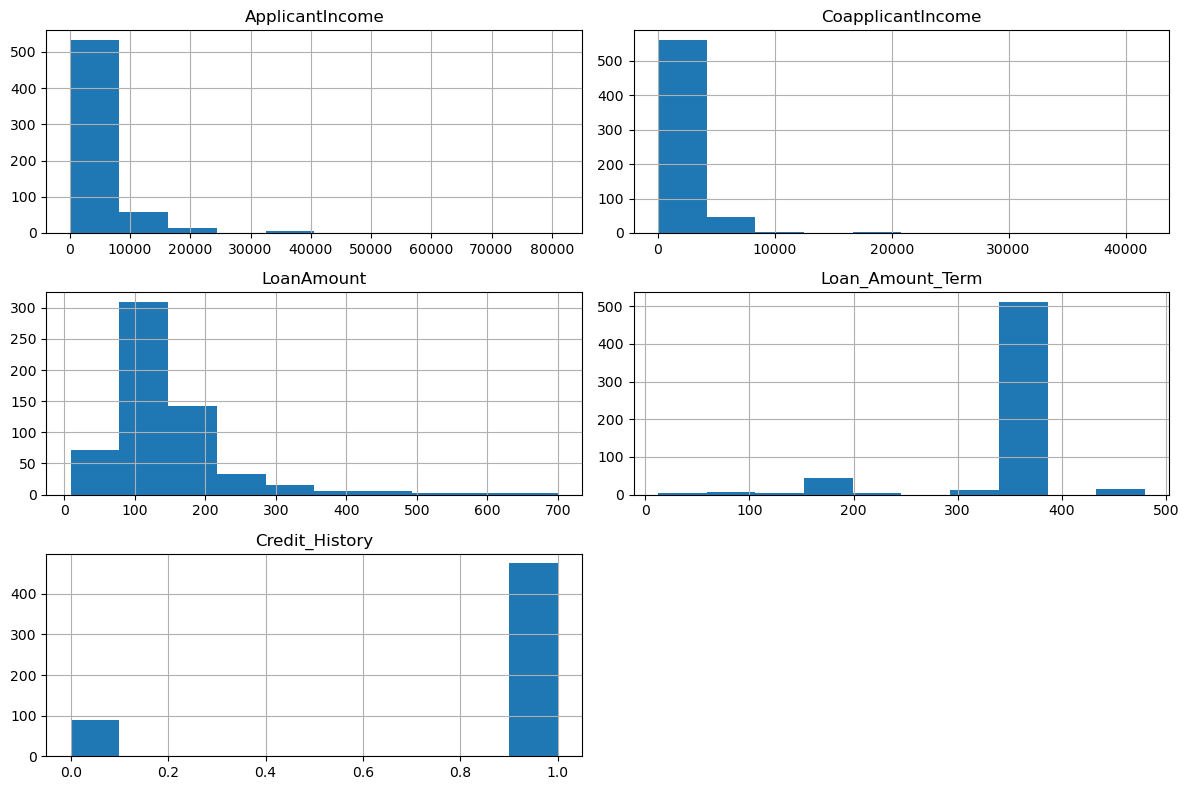

In [34]:
# Plot histograms of numerical variables
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()



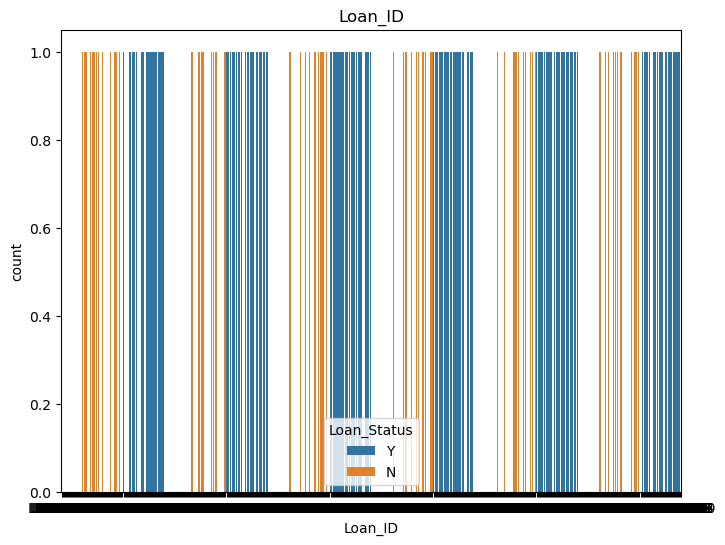

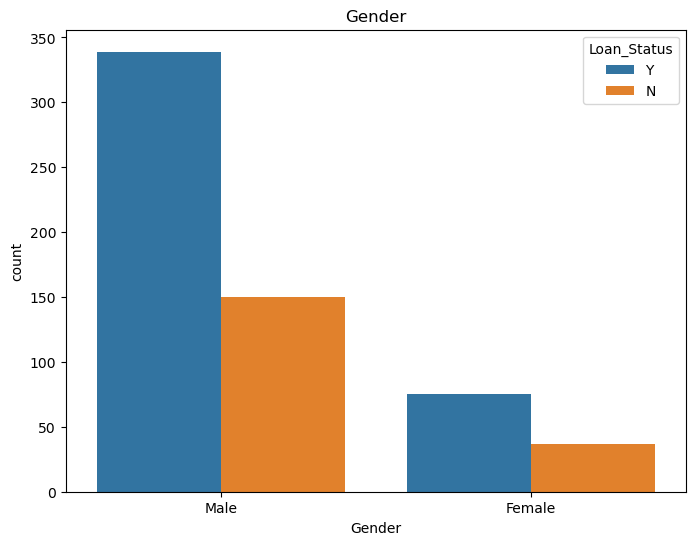

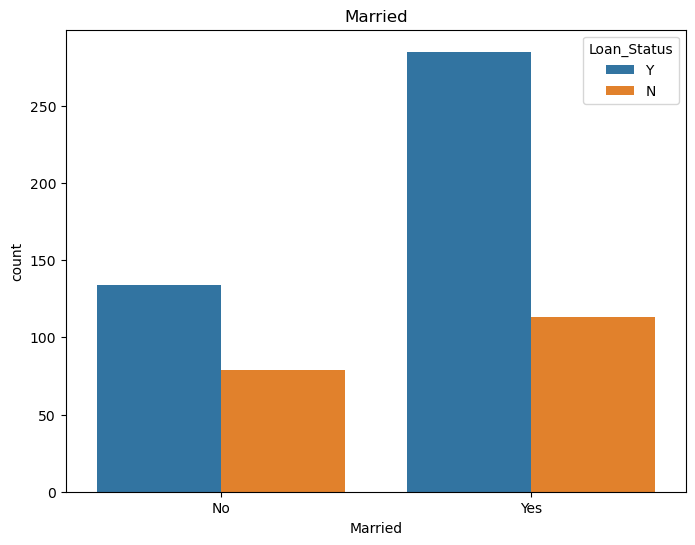

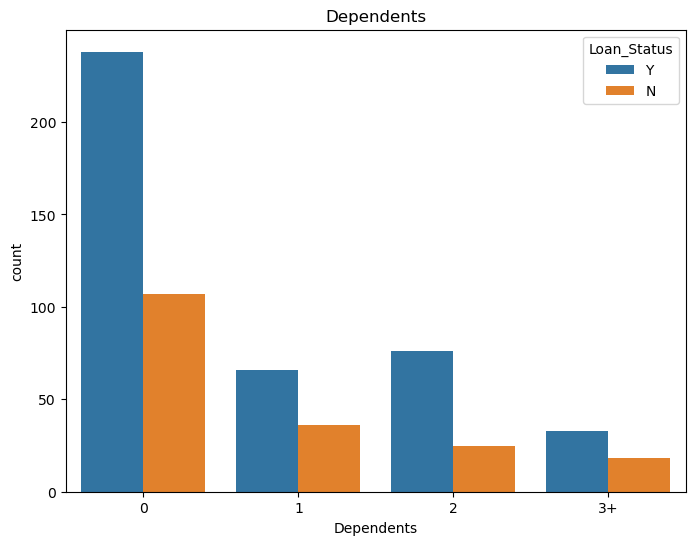

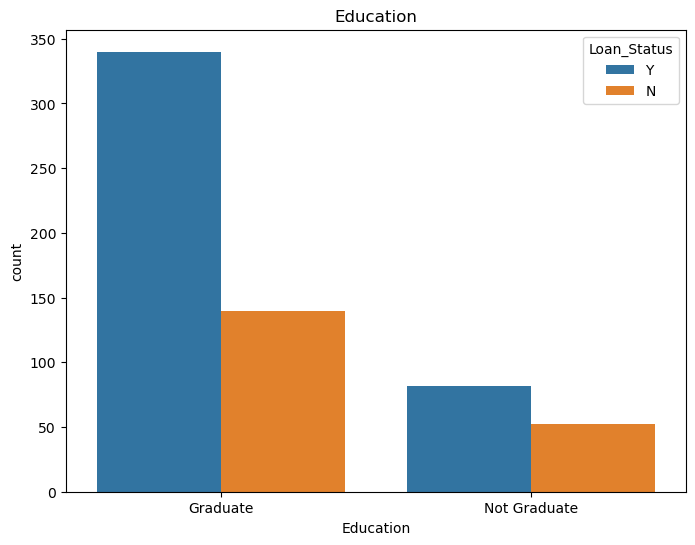

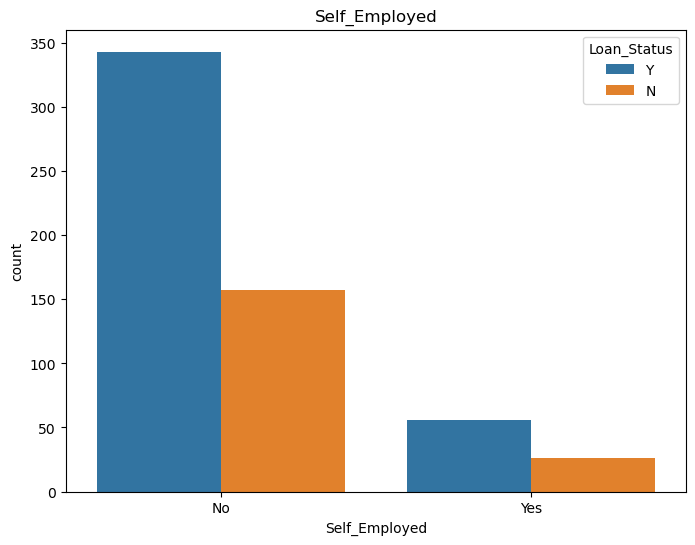

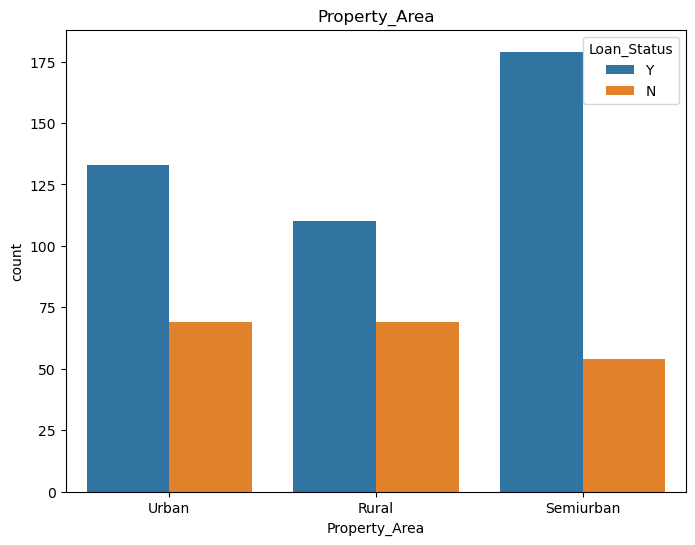

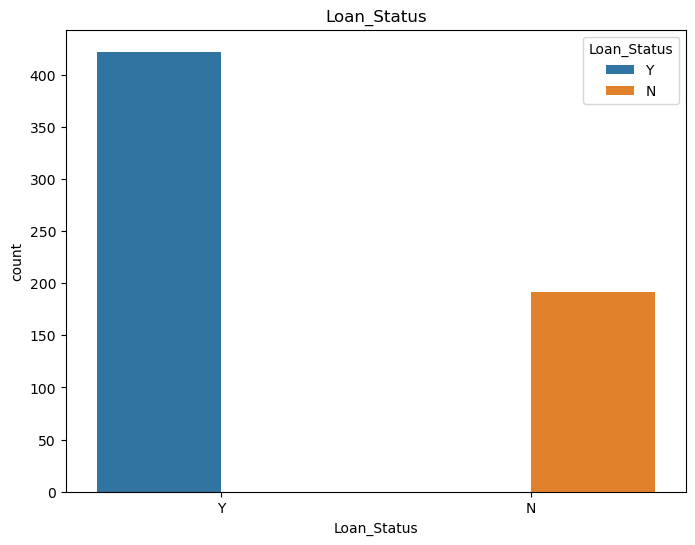

In [13]:
# Plot bar plots of categorical variables
cat_vars = df.select_dtypes(include=['object']).columns
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='Loan_Status')
    plt.title(var)
    plt.show()


In [35]:
# Check for missing values
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [37]:
# Check the columns in the dataset
print(test_test_test_test_test_df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [38]:
# Impute missing values in numerical columns with the mean
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Impute missing values in categorical columns with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

# Converting Categorical Variables
# Perform label encoding for binary categorical variables
binary_variables = ['Gender', 'Married', 'Education', 'Self_Employed']
label_encoder = LabelEncoder()
for var in binary_variables:
    df[var] = label_encoder.fit_transform(df[var])

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Feature Engineering (example: creating a new feature for total income)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Drop unnecessary columns (if any)
df = df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1)


In [41]:
df.describe()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,0.817590,0.653094,0.218241,0.133550,5.786179e-18,3.905671e-17,2.488057e-16,3.471707e-17
std,0.386497,0.476373,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,1.330291e+00
min,0.000000,0.000000,0.000000,0.000000,-1.636463e+00,-5.130593e+00,-2.410441e+00,-1.203474e+00
25%,1.000000,0.000000,0.000000,0.000000,-5.497524e-01,2.798505e-01,4.516405e-01,-6.605985e-01
50%,1.000000,1.000000,0.000000,0.000000,-2.073642e-01,2.798505e-01,4.516405e-01,-2.950724e-01
75%,1.000000,1.000000,0.000000,0.000000,2.183882e-01,2.798505e-01,4.516405e-01,1.492122e-01
max,1.000000,1.000000,1.000000,1.000000,6.592764e+00,2.145521e+00,4.516405e-01,1.287910e+01


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Separate the features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Encode the 'Dependents' column
le = LabelEncoder()
X['Dependents'] = le.fit_transform(X['Dependents'])

# Perform one-hot encoding for 'Property_Area'
property_area_ohe = OneHotEncoder(sparse=False)
property_area_encoded = property_area_ohe.fit_transform(X[['Property_Area']])
property_area_df = pd.DataFrame(property_area_encoded, columns=property_area_ohe.get_feature_names(['Property_Area']))
X = pd.concat([X, property_area_df], axis=1)
X = X.drop('Property_Area', axis=1)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Perform cross-validation to evaluate the model performance
cv_scores = cross_val_score(model, X, y, cv=5)

# Calculate the average accuracy score
avg_accuracy = cv_scores.mean()

# Print the average accuracy score
print("Average Accuracy Score:", avg_accuracy)


Average Accuracy Score: 0.8061975209916034


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [48]:
# Separate the features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Encode the 'Dependents' column
le = LabelEncoder()
X['Dependents'] = le.fit_transform(X['Dependents'])

# Perform one-hot encoding for 'Property_Area'
property_area_ohe = OneHotEncoder()
column_transformer = ColumnTransformer([('encoder', property_area_ohe, ['Property_Area'])], remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Create a pipeline for the model
pipeline = Pipeline([('model', model)])

# Define the hyperparameter grid for grid search
param_grid = {'model__C': [0.1, 1, 10]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_encoded, y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and the corresponding score
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'model__C': 0.1}
Best Score: 0.8078368652538984


In [60]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Read the test dataset
test_df = pd.read_csv('test.csv')



In [61]:
# Impute missing values in numerical columns with the mean
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
imputer = SimpleImputer(strategy='mean')
test_df[numerical_columns] = imputer.fit_transform(test_df[numerical_columns])

# Impute missing values in categorical columns with the mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
imputer = SimpleImputer(strategy='most_frequent')
test_df[categorical_columns] = imputer.fit_transform(test_df[categorical_columns])

# Converting Categorical Variables
# Perform label encoding for binary categorical variables
binary_variables = ['Gender', 'Married', 'Education', 'Self_Employed']
label_encoder = LabelEncoder()
for var in binary_variables:
    test_df[var] = label_encoder.fit_transform(test_df[var])

# Feature Scaling
scaler = StandardScaler()
test_df[numerical_columns] = scaler.fit_transform(test_df[numerical_columns])

# Feature Engineering (example: creating a new feature for total income)
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']


In [62]:


# Make predictions using the best model
X_test = test_df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1)  # Extract features from the test dataset
X_test['Dependents'] = le.transform(X_test['Dependents'])  # Encode 'Dependents' column
X_test_encoded = column_transformer.transform(X_test)  # Perform one-hot encoding for categorical columns

y_pred = best_model.predict(X_test_encoded)  # Make predictions on the test dataset

# Create a submission dataframe with Loan_ID and Loan_Status columns
submission_df = pd.DataFrame({'Loan_ID': test_df['Loan_ID'], 'Loan_Status': y_pred})

# Save the submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)